<a href="https://colab.research.google.com/github/edsrisk/practice_learning/blob/main/lstm_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM Model for Univariate Time Series Forecasting - 
Problem Statement: Univariate Time Series Forecasting - 
eg: sales = [110, 125, 133,146, 158, 172, 187, 196, 210] -
Predict sales data using the previous three days of sales data, i.e. predict t +1 from t, t-1, and t-2

credit to: Krish Naik
https://www.youtube.com/watch?v=UbvkhuqVqUI

In [ ]:
# Import libraries and dependencies
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


In [ ]:
# Preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
  X, y = [], []
  for i in range(len(timeseries_data)): # i = 0 to 9
    # find the end of this pattern
    end_ix = i + n_features # end_ix(0) = 0 + 3 = 3; this is the 4th element in the array; the model looks at the first three elements and estimates the 4th element; looks at 2nd to 4th, then estimates 5th, and so on 
    print('i = ', i, '; end_ix =', end_ix)
    # check if we are beyond the sequence
    if end_ix > len(timeseries_data) - 1: # Interrupt process once we hit the last element in the array 
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = timeseries_data[i: end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

# define input sequence
timeseries_data = [110, 125, 133,146, 158, 172, 187, 196, 210]

# choose a number of time steps (lags)
n_features = 3
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_features)
X, y = prepare_data(timeseries_data, n_steps)


i =  0 ; end_ix = 3
i =  1 ; end_ix = 4
i =  2 ; end_ix = 5
i =  3 ; end_ix = 6
i =  4 ; end_ix = 7
i =  5 ; end_ix = 8
i =  6 ; end_ix = 9
i =  0 ; end_ix = 3
i =  1 ; end_ix = 4
i =  2 ; end_ix = 5
i =  3 ; end_ix = 6
i =  4 ; end_ix = 7
i =  5 ; end_ix = 8
i =  6 ; end_ix = 9


In [ ]:
# print X input variables
print(X)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [ ]:
# print y output variables
print(y)

[146 158 172 187 196 210]


In [ ]:
len(timeseries_data)

9

In [ ]:
range(len(timeseries_data))

range(0, 9)

In [ ]:
X.shape

(6, 3)

In [ ]:
y.shape

(6,)

In [ ]:
# Convert/reshape from 2D - rows, columns (6,3) to 3D - rows, columns, features (6,3,1); this conversion will allow us to use n_features as an assitional input into the LSTM
n_features = 1
X.shape[0] # no. of rows
X.shape[1] # no. of columns
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
print(X) # Notice that X was originall '[[]]' and reshaped to '[[[]]]'

[[[110]
  [125]
  [133]]

 [[125]
  [133]
  [146]]

 [[133]
  [146]
  [158]]

 [[146]
  [158]
  [172]]

 [[158]
  [172]
  [187]]

 [[172]
  [187]
  [196]]]


In [ ]:
X.shape

(6, 3, 1)

Building the LSTM Model

In [ ]:
# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1)) # output layer, one output
model.compile(optimizer='adam', loss='mse') # mean square error

# fit model
model.fit(X, y, epochs=300, verbose=0) # verbose = 1 prints out the epochs, 0 does not print

Predicting the next 10 output data and overlay the historical data

In [ ]:

# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[224.67345]
1 day input [196.         210.         224.67344666]
1 day output [[236.18416]]
2 day input [210.         224.67344666 236.18415833]
2 day output [[250.44221]]
3 day input [224.67345 236.18416 250.44221]
3 day output [[264.77585]]
4 day input [236.18416 250.44221 264.77585]
4 day output [[278.1715]]
5 day input [250.44221 264.77585 278.1715 ]
5 day output [[293.1142]]
6 day input [264.77585 278.1715  293.1142 ]
6 day output [[308.1717]]
7 day input [278.1715 293.1142 308.1717]
7 day output [[323.26038]]
8 day input [293.1142  308.1717  323.26038]
8 day output [[339.3534]]
9 day input [308.1717  323.26038 339.3534 ]
9 day output [[355.76907]]
[224.67345, 236.18416, 250.44221, 264.77585, 278.1715, 293.1142, 308.1717, 323.26038, 339.3534, 355.76907]


In [ ]:
print(lst_output)

[225.89087, 237.81557, 253.27771, 269.24695, 283.86545, 300.90897, 318.21094, 335.537, 354.61847, 374.1502]


In [64]:

timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [65]:

len(timeseries_data)

9

In [66]:
# Data Visualization
import matplotlib.pyplot as plt

In [70]:
new_day = np.arange(1, 10)
predicted_sale = np.arange(10, 20)

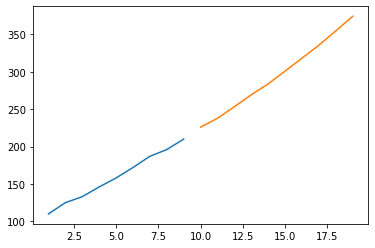

In [71]:
plt.plot(new_day, timeseries_data)
plt.plot(predicted_sale, lst_output)